First, we set up the base <em>b</em> for the computations.  Our strategy depends on whether <em>b</em> is inside, outside, or on the boundary of the Shell-Thron region.  This is the region for which the sequence 1, <em>b</em>, <em>b<sup>b</sup></em>, <em>b</em>^<em>b</em>^<em>b</em>, <em>b</em>^<em>b</em>^<em>b</em>^<em>b</em>, ...   converges to a single number.  Here is a picture of this region, highlighting the numbers <em>e</em><sup>1/<em>e</em></sup> and the Sheldon base.

In [1]:
Sheldon = N(1525982338517/1000000000000 +  178411853321/10000000000000*I, digits=400); Sheldon

1.525982338517000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 + 0.01784118533210000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000*I

In [2]:
b = Sheldon

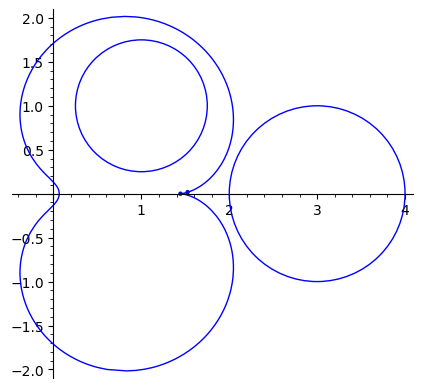

In [3]:
var("t")
G = parametric_plot((real_part(e^(-e^(I*t)*e^(e^(I*t)))), imag_part(e^(-e^(I*t)*e^(e^(I*t))))), (t, -pi, pi))
G += point((e^(1/e),0))
G += point((b.real(),b.imag()))
G += circle((1,1),3/4)
G += circle((3,0),1);G

First, we want to enter the base <em>b</em> that we will use.

In [4]:
n = 30

In [5]:
b = 1 + I + 3*cos(n*pi/100)/4 + 3*I*sin(n*pi/100)/4;b

3/16*I*sqrt(5) + 3/16*sqrt(-2*sqrt(5) + 10) + 19/16*I + 1

In [6]:
bb = N(b, digits=1200); bb

1.44083893921935484687652946597930457644823932823235949330420436056795885562176396813137803739705600197003984870206449452475419774445193079789945444918347943545065012371099473009309846143831209952233035019782687492656348562063187302329912100471309883607910782081527213931018850733655720107675305180486521292349469655185377014354049528358951016942493092437270847333781512528278883786629686295318457214523834046445024737761239173844203575209829636567445443752627091136014969930885632646440150906818032800842003784104391745359334094352059763325225127403568523366214964059727269228552922738016129017729149269200058056656001227570303706656516145807625747327459108946369704625037792040379603645997669658859843099924808593222222214902494851948192896768472981993092229478310925175535823255667382553280424833138921817179881788237245387315590403830485625281662196816871895610311234898656873350679352921381407748186051992527865529162020305138738418377539809460378406869053169587270482819524815534505473898411890

Let <em>L</em> be the fixed point of the exponential function <em>b<sup>z</sup></em>.<br>

In order to get the correct fixed points for all possible bases, we will use the formulas provided by Kouznetsov.  First we define the <strong>Omega</strong> function, which incorporates nearly all of the Riemann sheets of the Lambert's <em>W</em> function.

In [7]:
def Omega(z):
    n = ceil((imag_part(z)-pi)/(2*pi))
    return lambert_w(n, -e^(z-pi*I-2*n*pi*I))

In [8]:
def Omega2(z):
    return conjugate(Omega(conjugate(z)))

The goal is to find a tetration that approaches <em>L</em><sub>1</sub> as the imaginary part of <em>z</em> goes to &infin;, and approaches <em>L</em><sub>2</sub> as the imaginary part of <em>z</em> goes to &minus;&infin;.  Because <em>b</em> may get close to the Shell-Thron boundary in the upper half plane, we will need more digits in <em>L</em><sub>1</sub>.

In [9]:
L1 = N(Omega2(log(log(b)) - I*pi)/(-log(b)), digits=1200); L1

0.49686756375733835927591065426831798007146612023546735262318758429162280718247837449707449660803484154768001731933822694712438251412721241794598915497053982941805545601305298245566357000754960603700194236063204957460292047202253348145287135511103801552950111686238729926760120566589784386176081663838482854777195920277887333069923997312597015007009292802572492659722102014675219910975179511539726056941539173028343136427155591122063948336597986846927498610557708261062225840049265536921825549631810978913479187120173079478124145607944810081310631050026768629199639818824377392738190940589875046489601979481663306937997769459937496735341837762553560416242543997957463231381775605258226436690120847418496809356408712850731705558357330781979684464453122286893060592939004968401968655055572933150537573389338835436921341293367930302196435538991710082188648593309072413005448391104005381974433606133730901009713092554132048020656436274965534392833249675432609662049591414460146436864041632971894361626771

In [10]:
L2 = N(Omega2(log(log(b)) + I*pi)/(-log(b)), digits=500); L2

-0.96764796576543968055696321289391571409688045418622427466940645155916769149857067629189888978176820790049787275039810164512354774085284369446848248158757148680710759860274396678686214388378141420914302827150829371513502751076625916217834478031332304764825280188912952645899464689975955843031444677088262862204402936602184870860443720695157954347229034892404729467120814675184884369391298687758050734522825761239990545621474410730876665729475395576530713002384792786393933074528184429442628944667563114 - 1.668705263927387807407868064987227962699837638391511794524362701182776517900185305949533744641398286662259157718201973052165020879828875797743293788425290939319799436501220301321639642147820061897545694740176722478875752660653866936007131914909542265565726105119496493756482817135468292340915458846956815401365477764135765272040311434401189211914848252953431927916019882776247339262485394396541460424689103355442019366333632057198361739356535429730549689004750629530477108606966014704232071379

We will also need to compute <em>s</em> = ln(<em>L</em>) = <em>L</em> ln(<em>b</em>) to the same precision.  For the double-dagger track method, we will assume that both |<em>s</em><sub>2</sub>| &gt; 1 and |<em>s</em><sub>1</sub>| &ne; 1.

In [11]:
ss1 = N(L1*log(b), digits=1200); ss1

-0.1808684721399459678308764810686141383668127850943797247747541652985363750059544499198462729595064798616451109815490651569197541586949905556224407676602934005151879745521471584431850293668871466727476699990189609558075322254315523655027833422294362340126283196397501121516819597954689150521057591083534208199334922757869992949616883619293230489528191705648985357731915549743217455962632381374079984376442885917484313657489226187376758502884840061460285924119863067853122605682935180586610049896704364442289279009510827697807517203932065301845395922317624682953272823353578933652533398823464550291254008444728763413041909887095327712719987200368577736672400037721277850092842172616505112881121154083742606663817783100986323168067907245414225680163696071056959367170167453096404893920251385367661976264793981125008695485748885250812211562144938592492572795821234342446564692951860219009280929255294467457686161555338683427198670614598423689884613825948809286520852152945266295671692279495667012542866

In [12]:
ss2 = N(L2*log(b), digits=500); ss2

0.65698545373970072661968891441401380215499266952176215471335254887884383103758258374480560875884909519652575794370525531499710827513151512219480073567754375895312839945458729961073622419117419582495974172818307461049439404237770956516476367781130887495918842471055084435549828145788884751022002579560620149854900190313878407123324399842595258216239347703757692558259331814187203401651554051771721912053118295132385350156335080087958273851771114257196418670788880691662817699583285352303028018902362091 - 2.0962899442816158841767345311636728691827667039317134791437316182378543513286438638187277122126866122175543425006155135779025801495375818534179048101523268547148280424350301923187168934636976721600710790054562734855559823926629468924938587032605209636707192317288584439359391132137016594158199248151736656967072056082124051322703288578756540690012439089550738073154939052182618609955119639783696698110165614888731681273829531916123869879588851283630272524650298567737952767633444917543941251390

The near-period in the upper half plane is

In [13]:
Pi = N(pi, digits=1200)
2*Pi*I/log(ss1)

3.56243766730209731936834474309219923741967103991301517334649142206985202471990785608397594943060935480708016675978106250986432532959277536776098342406687999812803811903561475387573169434064522052267289269454963361896893448714802623702240687767418671879474024006084377006096470017153854204695356660674537506127751041853427005697629685382707308446505929016933127997684872575234758322752675338391937839902720578730649339687596513209708371762024276500607175132665512135641132606758552422683769184757944995223415796297007392379025278282445600675229239523696450328032591159126882777560211900315548796592153779821623932329005826628837118204807773505408742023420423362838491473070342989228707431411634422645856584797775164755020914656796941072161063784443966999169566944332216598244767155133102090993238416481081186790220430290038195851726727839153749546291023872546732151124049201362875819716409738935467466446960054511979233891012058526521260431984018569382158041160175475246665444102075730833402532984838

<strong>First approximation</strong><br><br>

Using &lambda;<sub><em>b</em></sub>(<em>z</em>) from the first paper creates a problem, since it converges to a function with a highly periodic component.<br>

Instead, we will look for a function that has many of the same properties as the tetration.  The goal is to find a function of the form<br>

<em>f</em>(<em>z</em>) = (<em>A e<sup>&minus;i s z</sup></em> + <em>B</em> + <em>C e<sup>i r z</sup></em>)/(<em>D e<sup>&minus;i s z</sup></em> + 1 + <em>F e<sup>i r z</sup></em>)<br>

with Re(<em>s</em>) &gt; 0 and Re(<em>r</em>) &gt; 0, such that <em>f</em>(&minus;1) = 0, <em>f</em>(0) = 1, <em>f</em>(1) = <em>b</em>, lim<sub><em>z</em> &rarr; <em>i</em> &infin;</sub> <em>f</em>(<em>z</em>) = <em>L</em><sub>1</sub>, lim<sub><em>z</em> &rarr; &minus;<em>i</em> &infin;</sub> <em>f</em>(<em>z</em>) = <em>L</em><sub>2</sub>, <em>f</em>(<em>z</em>) &sim; <em>L</em><sub>1</sub> + <em>k</em><sub>1</sub> <em>e</em><sup>ln(<em>s</em>&#8321;) <em>z</em></sup> as <em>z</em> &rarr; <em>i</em> &infin;, and <em>f</em>(<em>z</em>) &sim; <em>L</em><sub>2</sub> + <em>k</em><sub>2</sub> <em>e</em><sup>ln(<em>s</em>&#8322;) <em>z</em></sup> as <em>z</em> &rarr; &minus;<em>i</em> &infin;.


In [14]:
def F0(z):
    AAA = L1^2*(ss2 - 1)*(bb - L2 + (bb - 1)*L2^2*log(bb))
    BBB = (L1-L2)*log(bb)*(-L1*L2*(L1 + L2) + bb*(L1^2 + L1*L2 + L2^2) + bb*L1*L2*(L1*L2 - L1 - L2)*log(bb))
    CCC = -L2^2*(ss1 - 1)*(bb - L1 + (bb - 1)*L1^2*log(bb))
    DDD = L1*(ss2 - 1)*(bb - L2 + (bb - 1)*L2^2*log(bb))
    EEE = (L1-L2)*(L1*L2 - bb*(L1+L2-1) + (-L1*L2*(L1 + L2) + bb*(L1^2 + L1*L2 + L2^2))*log(bb) + L1*L2*(L1*L2-L1-L2)*log(bb)^2)
    FFF = -L2*(ss1 - 1)*(bb - L1 + (bb - 1)*L1^2*log(bb))
    return (AAA*e^(-log(ss1)*z) + BBB + CCC*e^(-log(ss2)*z))/(DDD*e^(-log(ss1)*z) + EEE + FFF*e^(-log(ss2)*z))

In [15]:
F0(-1)

6.0295744253787983944853907587089772933315640116291867740136086693744216510703269913763714976363041256517903072814318150758285407119748774293786080740482686516937188727440251731035485859636978292956133346600142868822970792355844357553903953081321931975286941952328182484179211054510740205324163674504520929180553177011683099342430964927062869107396321925310540585672763846058361601205608624396210919786650613490242357536335801375233482775763075909485787446996371629082992357929994083791074790077371287e-501 - 1.783288919163955430662009823853442468886149843524251524344359471330726598637138356611403227762389674059695825948240267178986732087689741275152137967512970864782761181666939343817998114686703157956745919633082096077178273266755877730897694848163022190011735426293341201585510849478914838766252908786363599422845455491098650260361988255331571363196807259434786761036891998293228228510518812767160672347068843380498920805531999014238554453124077514779354608217864005070686426861678053424268112

In [16]:
F0(0)

1.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 + 2.43846884265514227968430841580803340056728059929734217210281727750827489485580700740670660034669135389157928348148304591017223339813755734209512277417196056215264141954525031404847122078524440255501410684026633789352321591780048513539246355858465893627006913788064249474118379080367813115491695043444551342076317499004933448319639127272853494751802932395407775609094486248546487055792049370081256100610837309417720170300132244605464755196046842417540945030249362917710747203572240278047125382126

In [17]:
F0(1)-bb

1.2192344213275711398421542079040167002836402996486710860514086387541374474279035037033533001733456769457896417407415229550861166990687786710475613870859802810763207097726251570242356103926222012775070534201331689467616079589002425676962317792923294681350345689403212473705918954018390655774584752172227567103815874950246672415981956363642674737590146619770388780454724312427324352789602468504062805030541865470886008515006612230273237759802342120877047251512468145885537360178612013902356269106309912e-501 + 1.219234421327571139842154207904016700283640299648671086051408638754137447427903503703353300173345676945789641740741522955086116699068778671047561387085980281076320709772625157024235610392622201277507053420133168946761607958900242567696231779292329468135034568940321247370591895401839065577458475217222756710381587495024667241598195636364267473759014661977038878045472431242732435278960246850406280503054186547088600851500661223027323775980234212087704725151246814588553736017861201390235626

The only danger of this first approximation is that it might have a pole in a very inconvenient place.  As long as this point is not directly on the double dagger, we should be ok.

In [18]:
DDD = L1*(ss2 - 1)*(bb - L2 + (bb - 1)*L2^2*log(bb))

In [19]:
EEE = (L1-L2)*(L1*L2 - bb*(L1+L2-1) + (-L1*L2*(L1 + L2) + bb*(L1^2 + L1*L2 + L2^2))*log(bb) + L1*L2*(L1*L2-L1-L2)*log(bb)^2)

In [20]:
FFF = -L2*(ss1 - 1)*(bb - L1 + (bb - 1)*L1^2*log(bb))

In [21]:
NewtonIt(z) = z - (DDD*e^(-log(ss1)*z)+EEE+FFF*e^(-log(ss2)*z))/(-log(ss1)*DDD*e^(-log(ss1)*z) - log(ss2)*FFF*e^(-log(ss2)*z))

In [22]:
-1.0*I

-1.00000000000000*I

Execute the following command repeatedly until it settles down on a root.

In [42]:
NewtonIt(_)

2.08050925635276 - 2.49992599504694*I

Let's make some plots to show how close <em>F</em><sub>0</sub>(<em>z</em> + 1) is to <em>b</em><sup><em>F</em>&#8320;(<em>z</em>)</sup>.

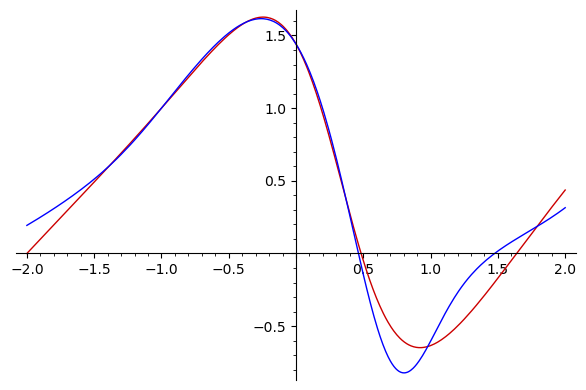

In [43]:
plot(real_part(F0(x + 1)), (x, -2, 2),rgbcolor=(0.8,0,0)) + plot(real_part(bb^F0(x)), (x, -2, 2))

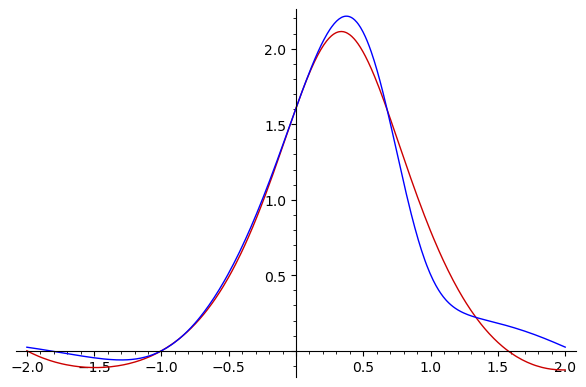

In [44]:
plot(imag_part(F0(x + 1)), (x, -2, 2),rgbcolor=(0.8,0,0)) + plot(imag_part(bb^F0(x)), (x, -2, 2))

We also want to check that the function does not have a singularity on the imaginary axis.

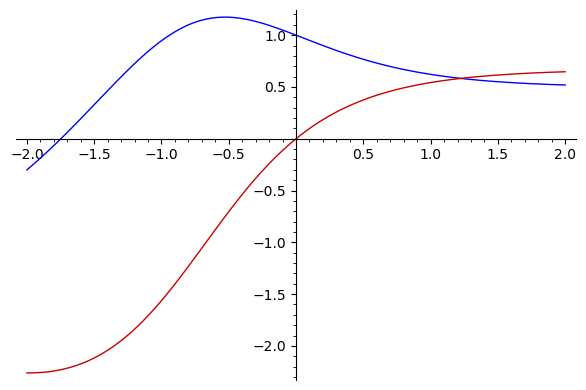

In [45]:
plot(real_part(F0(I*x)), (x,-2,2)) + plot(imag_part(F0(I*x)), (x,-2,2),rgbcolor=(0.8,0,0))

<strong>Kneser's Solution</strong><br><br>

Let us find the solutions to Abel's equation centered at the fixed points <em>L</em><sub>1</sub> and <em>L</em><sub>2</sub>.
The solution <em>&psi;</em><sub><em>b</em></sub>(<em>x</em>) will only be valid if the imaginary part is non-negative, and <em>&psi;</em><sub><em>b</em></sub>(0), <em>&psi;</em><sub><em>b</em></sub>(1), <em>&psi;</em><sub><em>b</em></sub>(<em>b</em>), <em>&psi;</em><sub><em>b</em></sub>(<em>b<sup>b</sup></em>), etc., are undefined.  Also, <em>&psi;</em><sub><em>b</em></sub>(<em>L</em>) is undefined.  The goal is to quickly calculate <em>&psi;</em><sub><em>b</em></sub>(<em>z</em>) to 100 places, which this seems to do for <em>b</em> &ge; 3/2.  Note that for <em>b</em> between <em>e</em><sup>1/<em>e</em></sup> and 3/2, the large number of iterations cause too much accumulatative error for this to work properly.<br>
    
Note that we moved the branch cut of the logarithms to get both functions defined on the real axis.    

In [46]:
abs(ss1)

0.95043207766670518764007585443560164289538878115009406342721189411138634121047505369966926140641495658816966962327967636489831355226879199481000765521961831835664657999865522452512142056618102075978250689334630486646216254762400316996875192884659382458936712275024236499047256146855126224150676397305469806771969408163357141390305521662152092080392023436732948515972780139858906612542324659917531114361786309430971547242736303849558854442197636214482092526136029305532755128421857296973722951835730781443203763735796322313537721856347449937448444869411512998478198157857928612495625880289603604803039315812508726985101018773122816392983974481058008089563720716000382200081582416345979445455452502763436707712279767015757702677641808254687665445552376640535851855419190436945422818746105077652376372050601288273898552390411619319471749181173873356187154349846575562890273884207788832986485398228612716577135447451959292877709445467044680533728460979193718982909623748042736064374303333421488958843414

Note : If this is very close to 1, we are very near the boundary of the Shell-Thron region, and should use the <strong>Sword-Track Method</strong>, which uses a very large value of <em>A</em><sub>1</sub>.

In [47]:
abs(ss2)

2.1968298561613233573211427254809752782916615452722782809490582120031305133018676364020250318737022952732873923004172514571573335668380446014580699613410639902802842027303483956340337445559030210849693548866404245239344535524407790791877877507930055379422421688971257498539778983339770791666344038740121818152662352899198944147902546421264876686978801771096198994433653124015071778531967212681516296341200782870142836988451640047836045986221896161678773348041115050545944694189013212583887514516888155

In [48]:
Sword = false

The  default  value  of <em>A</em><sub>1</sub> and <em>A</em><sub>2</sub> is 1, but <em>A</em><sub>1</sub> can be much larger, like 15/2 if we are using the <strong>Sword-Track Method</strong>, and <em>A</em><sub>2</sub> can be reduced to 1/2 to keep the region from getting into the &quot;pineapple top&quot;.

In [49]:
A1 = 1

In [50]:
A2 = 1

The Offset is usually 0, but we can shift the contour by setting the offset to a different value within the contour.  We want the solution to satisfy <strong>F(Offset) = 1</strong>.  Note the that real part of the offset must be between -1 and 1, the imaginary part must be between -1/2 and 1/2.

In [51]:
OffSet = 0

For the Sword-track method, we need several coefficients of the <em>&psi;</em><sub>1</sub><sup>&minus;1</sup>(<em>z</em>) series.   This is the same as the Maclaurin coefficients for <em>&sigma;</em><sub>1</sub><sup>&minus;1</sup>(<em>z</em>), which satisfies the equation <em>b</em><sup><em>&sigma;</em>&#8315;&sup1;(<em>z</em>)</sup> = <em>&sigma;</em><sup>&minus;1</sup>(<em>s</em><sub>1</sub> <em>z</em>).

In [52]:
if Sword:
    var("xxx")
    NN = floor(2*Pi/imag_part(log(ss1))+3/2)
    for iii in range(NN+1):
        var("aa"+str(iii))
    aa = [eval("aa"+str(iii)) for iii in range(NN+1)]
    aa[0] = 0
    aa[1] = 1
    for jjj in range(2, NN+1):
        siginv = xxx
        for iii in range(2, NN+1):
            siginv = siginv + aa[iii]*xxx^iii
        zzz = L1*(bb^siginv -1) - siginv.subs(xxx=ss1*xxx)
        zzz = zzz.series(xxx,NN+1)
        zzz = zzz.coefficients()
        zzz = zzz[jjj][0]
        yyy = zzz.series(aa[jjj],2).coefficients()
        aa[jjj] = -yyy[0][0]/yyy[1][0]
        ## We also need the coefficients for the psi_1(z) series.  This is found by taking ln(sigma_1(z)/ln(s1)).
    siginv = xxx
    for iii in range(2, NN+1):
        siginv = siginv + aa[iii]*xxx^iii  
    zzz = siginv.power_series(SR)
    sig = zzz.reverse()
    sigx = 1
    for iii in range(2,NN+1):
        sigx = sigx + sig[iii]*xxx^(iii-1)
    sigx = sigx.power_series(SR)
    yyy = log(sigx)/log(ss1)
    bbb = yyy.coefficients()

Now we can define <em>&psi;</em><sub>1</sub>(<em>z</em>) for all cases.

In [53]:
Th = 1
## The direction of the branch cut can be adjusted by changing the value of Th
if Sword:
    ## Use only if |s_1| is close to 1.
    def psi1(z):
        ret = log(z-L1)/log(ss1)
        for iii in range(len(bb)):
            ret = ret + bbb[iii]*(z-L1)^(iii+1)
        return ret
else:
    if abs(ss1) > 1:
        ## This assumes |s_1| > 1.
        def psi1(z):
            xx = CC.to_prec(1993)(z) ## 600 digits
            n = 0
            while abs(xx - L1) > 10^(-55):
                xx = (log(-I*xx) + Pi*I/2)/log(bb)
                n = n+1
            zz = (xx - L1) + ss1*(xx - L1)^2/(2*L1*(1-ss1)) + ss1^2*(1+2*ss1)*(xx - L1)^3/(6*L1^2*(1 - ss1)*(1 - ss1^2))
            zz = zz + ss1^3*(1 + 6*ss1 + 5*ss1^2 + 6*ss1^3)*(xx - L1)^4/(24*L1^3*(1 - ss1)*(1 - ss1^2)*(1 - ss1^3))
            zz = zz + ss1^4*(1+14*ss1+24*ss1^2+45*ss1^3+46*ss1^4+26*ss1^5+24*ss1^6)*(xx-L1)^5/(120*L1^4*(1-ss1)*(1-ss1^2)*(1-ss1^3)*(1-ss1^4))
            zz = zz + ss1^5*(1+30*ss1+89*ss1^2+214*ss1^3+374*ss1^4+416*ss1^5+511*ss1^6+461*ss1^7+330*ss1^8+154*ss1^9+120*ss1^10)*(xx-L1)^6/(720*L1^5*(1-ss1)*(1-ss1^2)*(1-ss1^3)*(1-ss1^4)*(1-ss1^5))
            zz = (log(ss1^n*e^(Th*I)*zz) - Th*I)/log(ss1)
            if real_part(zz) < -5:
                ## Moving the branch cut
                zz = zz + 2*Pi*I/log(ss1)
            return zz
    else:
        ## This assumes |s_1| < 1.  Note that this will only be defined withing the basin of attraction for L1.
        def psi1(z):
            xx = CC.to_prec(2495)(z) ## 750 digits
            n = 0
            while abs(xx - L1) > 10^(-55):
                xx = N(e^(log(bb)*xx), digits = 750)
                n = n - 1
            zz = (xx - L1) + ss1*(xx - L1)^2/(2*L1*(1-ss1)) + ss1^2*(1+2*ss1)*(xx - L1)^3/(6*L1^2*(1 - ss1)*(1 - ss1^2))
            zz = zz + ss1^3*(1 + 6*ss1 + 5*ss1^2 + 6*ss1^3)*(xx - L1)^4/(24*L1^3*(1 - ss1)*(1 - ss1^2)*(1 - ss1^3))
            zz = zz + ss1^4*(1+14*ss1+24*ss1^2+45*ss1^3+46*ss1^4+26*ss1^5+24*ss1^6)*(xx-L1)^5/(120*L1^4*(1-ss1)*(1-ss1^2)*(1-ss1^3)*(1-ss1^4))
            zz = zz + ss1^5*(1+30*ss1+89*ss1^2+214*ss1^3+374*ss1^4+416*ss1^5+511*ss1^6+461*ss1^7+330*ss1^8+154*ss1^9+120*ss1^10)*(xx-L1)^6/(720*L1^5*(1-ss1)*(1-ss1^2)*(1-ss1^3)*(1-ss1^4)*(1-ss1^5))
            zz = (log(ss1^n*e^(Th*I)*zz) - Th*I)/log(ss1)    
            return zz

We need to adjust <strong>Th</strong> so that the following two graphs are continuous (no jumps) from -1/2 to 1/2. 

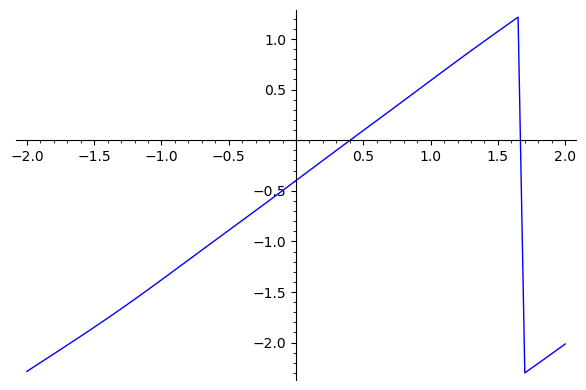

In [54]:
var("z")
list_plot([[z/20,real_part(N(psi1(F0(z/20 + A1*I/2 - OffSet))))] for z in range(-40,41)], plotjoined=True)

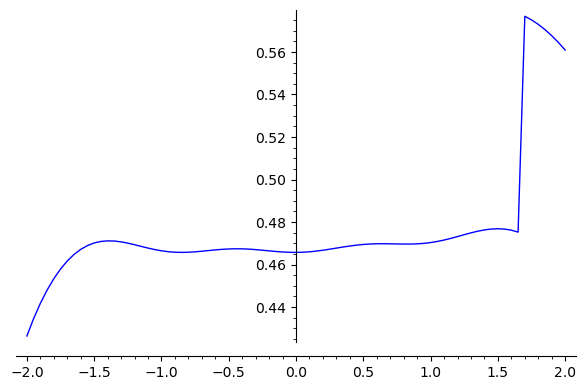

In [55]:
list_plot([[z/20,imag_part(N(psi1(F0(z/20 + A1*I/2 - OffSet))))] for z in range(-40,41)], plotjoined=True)

For both <strong>Dagger-Track</strong> and <strong>Sword-Track</strong>:  The function <em>&psi;</em><sub>2</sub>(<em>z</em>) is the same for all methods, provided that the imaginary part of <em>b</em> is non-negative.

In [56]:
Th2 = 0
Th3 = 0
def psi2(z):
    ## |ss2| will be > 1 if the imaginary part of b is non-negative.
    xx = CC.to_prec(1661)(z) ## 500 digits
    n = 0
    while abs(xx - L2) > 10^(-55):
        xx = (log(e^(Th3*I)*xx) - Th3*I)/log(bb)
        ## Put the branch cut to ensure that the first log will produce a number with a negative imaginary part.
        ## Otherwise, it won't converge to L2.
        n = n+1
    zz = (xx - L2) + ss2*(xx - L2)^2/(2*L2*(1-ss2)) + ss2^2*(1+2*ss2)*(xx - L2)^3/(6*L2^2*(1 - ss2)*(1 - ss2^2))
    zz = zz + ss2^3*(1 + 6*ss2 + 5*ss2^2 + 6*ss2^3)*(xx - L2)^4/(24*L2^3*(1 - ss2)*(1 - ss2^2)*(1 - ss2^3))
    zz = zz + ss2^4*(1+14*ss2+24*ss2^2+45*ss2^3+46*ss2^4+26*ss2^5+24*ss2^6)*(xx-L2)^5/(120*L2^4*(1-ss2)*(1-ss2^2)*(1-ss2^3)*(1-ss2^4))
    zz = zz + ss2^5*(1+30*ss2+89*ss2^2+214*ss2^3+374*ss2^4+416*ss2^5+511*ss2^6+461*ss2^7+330*ss2^8+154*ss2^9+120*ss2^10)*(xx-L2)^6/(720*L2^5*(1-ss2)*(1-ss2^2)*(1-ss2^3)*(1-ss2^4)*(1-ss2^5))
    zz = (log(ss2^n*e^(Th2*I)*zz) - Th2*I)/log(ss2)
    return zz

Again, we must adjust <strong>Th2</strong> and <strong>Th3</strong> so that the following graphs are continuous (no jumps) from &minus;1/2 to 1/2.

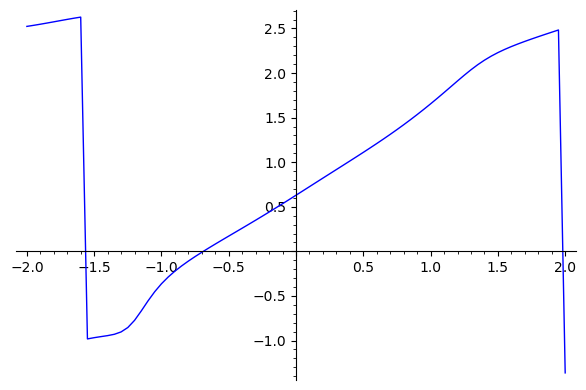

In [57]:
var("z")
list_plot([[z/20,real_part(N(psi2(F0(z/20 - A2*I/2 - OffSet))))] for z in range(-40,41)], plotjoined=True)

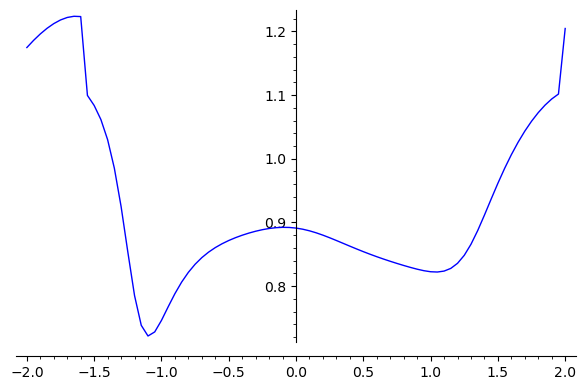

In [58]:
list_plot([[z/20,imag_part(N(psi2(F0(z/20 - A2*I/2 - OffSet))))] for z in range(-40,41)], plotjoined=True)

The inverse function is in fact an entire function.  These two functions are used for Kneser's solution.  Note that &psi;<sub>1</sub><sup>&minus;1</sup>(<em>z</em>) is not used in the Sword-track method.

In [59]:
if not Sword:
    if abs(ss1) > 1:
        ## Assumes |ss1| > 1.
        def psiinv1(z):
            xx = CC.to_prec(4983)(z) ## 1500 digits
            n = floor((42 + real_part(xx*log(ss1)))/real_part(log(ss1)))
            if n > 1000:
                return NaN
            tt = e^((xx - n)*log(ss1))
            yy = L1 + tt - ss1*tt^2/(2*L1*(1 - ss1)) + ss1^2*(2 + ss1)*tt^3/(6*L1^2*(1 - ss1)*(1 - ss1^2))
            yy = yy - ss1^3*(6 + 6*ss1 + 5*ss1^2 + ss1^3)*tt^4/(24*L1^3*(1 - ss1)*(1 - ss1^2)*(1 - ss1^3))
            yy = yy + ss1^4*(24+36*ss1+46*ss1^2+40*ss1^3+24*ss1^4+9*ss1^5+ss1^6)*tt^5/(120*L1^4*(1-ss1)*(1-ss1^2)*(1-ss1^3)*(1-ss1^4))
            yy = yy - ss1^5*(120+240*ss1+390*ss1^2+480*ss1^3+514*ss1^4+416*ss1^5+301*ss1^6+160*ss1^7+64*ss1^8+14*ss1^9+ss1^10)*tt^6/(720*L1^5*(1-ss1)*(1-ss1^2)*(1-ss1^3)*(1-ss1^4)*(1-ss1^5))
            for i in range(n):
                yy = bb^yy
                if abs(log(yy)) > 25:
                    ## failsafe in case there is an overflow or underflow
                    return NaN
            return yy
    else:
        ## Assumes |ss1| < 1.
        def psiinv1(z):
            xx = xx = CC.to_prec(997)(z) ## 300 digits
            n = - floor((38 + real_part(xx*log(ss1)))/real_part(log(ss1)))
            tt = e^((xx + n)*log(ss1))
            yy = L1 + tt - ss1*tt^2/(2*L1*(1 - ss1)) + ss1^2*(2 + ss1)*tt^3/(6*L1^2*(1 - ss1)*(1 - ss1^2))
            yy = yy - ss1^3*(6 + 6*ss1 + 5*ss1^2 + ss1^3)*tt^4/(24*L1^3*(1 - ss1)*(1 - ss1^2)*(1 - ss1^3))
            yy = yy + ss1^4*(24+36*ss1+46*ss1^2+40*ss1^3+24*ss1^4+9*ss1^5+ss1^6)*tt^5/(120*L1^4*(1-ss1)*(1-ss1^2)*(1-ss1^3)*(1-ss1^4))
            yy = yy - ss1^5*(120+240*ss1+390*ss1^2+480*ss1^3+514*ss1^4+416*ss1^5+301*ss1^6+160*ss1^7+64*ss1^8+14*ss1^9+ss1^10)*tt^6/(720*L1^5*(1-ss1)*(1-ss1^2)*(1-ss1^3)*(1-ss1^4)*(1-ss1^5))
            for i in range(n):
                yy = (log(-I*yy) + Pi*I/2)/log(bb)
                ## No failsafe is needed in this case
            return yy

In [60]:
def psiinv2(z):
    ## |ss2| will be > 1 if the imaginary part of b is non-negative.
    xx = CC.to_prec(1495)(z) ## 450 digits
    n = floor((42 + real_part(xx*log(ss2)))/real_part(log(ss2)))
    if n > 1000:
        return NaN
    tt = e^((xx - n)*log(ss2))
    yy = L2 + tt - ss2*tt^2/(2*L2*(1 - ss2)) + ss2^2*(2 + ss2)*tt^3/(6*L2^2*(1 - ss2)*(1 - ss2^2))
    yy = yy - ss2^3*(6 + 6*ss2 + 5*ss2^2 + ss2^3)*tt^4/(24*L2^3*(1 - ss2)*(1 - ss2^2)*(1 - ss2^3))
    yy = yy + ss2^4*(24+36*ss2+46*ss2^2+40*ss2^3+24*ss2^4+9*ss2^5+ss2^6)*tt^5/(120*L2^4*(1-ss2)*(1-ss2^2)*(1-ss2^3)*(1-ss2^4))
    yy = yy - ss2^5*(120+240*ss2+390*ss2^2+480*ss2^3+514*ss2^4+416*ss2^5+301*ss2^6+160*ss2^7+64*ss2^8+14*ss2^9+ss2^10)*tt^6/(720*L2^5*(1-ss2)*(1-ss2^2)*(1-ss2^3)*(1-ss2^4)*(1-ss2^5))
    for i in range(n):
        yy = bb^yy
        if abs(log(yy)) > 25:
            ## failsafe in case there is an overflow or underflow
            return NaN
    return yy

<strong>The Double Dagger Track / Sword Method</strong><br><br>

Step 1)  We are now ready to set the value of <em>n</em>.  This is the number of nodes per unit that is used for the Gaussian Quadrature.  For <em>SageMath</em>, <em>n</em> must be even, and also <em>n</em>(<em>A</em><sub>1</sub> + <em>A</em><sub>2</sub>) must be even.

In [61]:
nn = 100; nn

100

We also want to set the precision goal of the final output.  It works best if this value is slightly more than <em>n</em>.

In [62]:
mm = 110
CMax = CC.to_prec(mm*log(10)/log(2))

For this value of <em>n</em>, we find the location of the nodes for the vertical part of the double dagger.  We let <em>G<sub>L</sub></em> be the array of nodes with the weights.

In [63]:
from sage.numerical.gauss_legendre import nodes
Nodes = nodes((A1+A2)*nn, ceil(mm*log(10)/log(2)))
GL = [[Nodes[i][0]*(A1+A2)-A2, Nodes[i][1]*(A1+A2)] for i in range((A1+A2)*nn)]
GL

[[-0.9999280712850699770492629175676554317578461292721318634844392519245226519876798848670652023053133833192482877,
  0.0001845900974712974439676276902751769749476335529837493747191945300702525789094248677219344165281795757323648989],
 [-0.9996210312809363963281364404147722017523548827499757970317082815906837436834560905457102335485659288534951318,
  0.0004296466304510570728326940197879498314994532488400333129954100911584555832544440176584064170243878964920790218],
 [-0.9990687218731521808173530579569978194523069685479407451947750807670217208148924780010346347905397161622903162,
  0.0006749606344793727503029257433585337208672322985335393441746469089595499074676862459609758141789194412027159234],
 [-0.9982711559489107094308078789420865794622827830940293042240977991655753822760148730653139779306760625882548422,
  0.0009201404593417719146868727764450291592264406308449992477923954070213817398902627660252773335087327271374390389],
 [-0.9972285142833797758196661883339829314657401127887345894

For the upper arch, we need the Gauss-Legendre coefficients for an integral from 0 to &pi;.  We will not need this for the Sword track method.

In [64]:
GA = 0
if not Sword:
    Nodes = nodes(2*nn, ceil(mm*log(10)/log(2)))
    GA = [[Nodes[i][0]*Pi, Nodes[i][1]*Pi] for i in range(2*nn)]
GA

[[0.0001129853612031572904370168138343880989646637919608697558192196152755536182209876789654759624446347885681802241,
  0.0002899534470706259598610549201803302474550044237203076565898475652007415229101294218203572098682013975667590867],
 [0.0005952826718752757616614720596505808265332890807296918059501072209374591488960045471937921113978311800959811044,
  0.0006748873489323248268315844764990857896316510498339607049768343582078621328163136232804236402789728811430318344],
 [0.001462848260876986167809548943781693472614157008166662262843654463694268245755282191044554187556211136287191302,
  0.001060225685371351565422232404932939017176466160753871345320147755422844995548116211273995346416864534878642616],
 [0.002715661885052266215422492016956332358417036753974585769306933493656575580288161264966584101664465875477088025,
  0.001445353253669424242268855105724139369993886333273689930839568847117318321069490358796900353731609398313870724],
 [0.0043534395834315699061540258908489425377626850666563

Finally, we need the Gauss-Legrandre coefficients for the slanted parts.

In [65]:
Nodes = nodes(nn, ceil(mm*log(10)/log(2)))
GS = [[Nodes[i][0]/2, Nodes[i][1]/2] for i in range(nn)]
GS

[[0.00007156830663969158044288266442483082041261817289919331645042016685554184273374406446296169317490171708502602398,
  0.0001836586226264179326015801645825840976676183906207269598218173772458376574577014783038663109782193863541354770],
 [0.0003770123401010453999591602034127094237862873948575746068170945755509519870406159348964313413946572645733086338,
  0.0004273481633795263098823395928727988109328463728656449509001872308521111488010546740127903726684513353681493928],
 [0.0009262163167187127034670669397172411408921779648924051374829875918416991040805102690403308941081691714710642476,
  0.0006709813428883706048598976072502800204827787377495690672661079559872056620934005689195452894820042943265668206],
 [0.001718765740639135086997526787804132317057135283369905335778063431239810471012410947622750194729820555317534210,
  0.0009139903003315937955856146818812989248016418512880509554602757399076772545207060687077921026032745398865898708],
 [0.002753901189252062998895313548065842040166590723

Step 2)  We evaluate the fit function along the imaginary axis at the Gaussian Quadrature points to allow us to approximate the integral.

In [66]:
HH = []
for iii in range(len(GL)):
    yyy = GL[iii][0]*I
    yyy = F0(yyy - OffSet)
    HH.append(CMax(yyy))
HH

[0.9461274152021837453536856442378952722838147294055623173244536583599593439245352362546127943951663774971193001 - 1.562871100625857900802245604954589248139939127092263846327054595918055222036593459522225248414568559298195832*I,
 0.9464212028590737129444197177884064366761131608649662918828904630292309833763570862798201313732312001946353584 - 1.562399412173294479955577382675646648214408235095982713925765296349134088171014242745567029147709891424869738*I,
 0.9469492645583146504622270734617546571596077632949085609054258806822807178976551472637637361462010295413895849 - 1.561550593604736463110524345930110107760068993855345212732599779084336189076199378495936583216285549707958316*I,
 0.9477108864301107755818544877144462857164894902584113943445914662448384065814627701617347586090972841763347394 - 1.560324089618521528754547254921945200331926222823886220068104207899468405755479058411351259107923062973676842*I,
 0.948704881158066082420728711961822774454502827327773856785085898631643975000342660

The <em>E</em> matrix allows us to define <em>H</em>(<em>a</em>) as the integral from &minus;<em>A</em><sub>2</sub> to <em>A</em><sub>1</sub> of the function (<em>b</em><sup>tet(<em>y</em>)</sup>/(1 + <em>i y</em> &minus; <em>a</em>) &minus; log<sub><em>b</em></sub>(tet(<em>y</em>))/(&minus;1 + <em>i y</em> &minus; <em>a</em>))/(2 &pi;), which can be integrated via the Gaussian quadrature.

In [67]:
def H(a):
    ret = 0
    for k in range(len(GL)):
        ret = ret + (bb^HH[k]/(1 + I*GL[k][0] - a) - log(HH[k])/log(bb)/(-1 + I*GL[k][0] - a))*GL[k][1]
    return CMax(ret/(2*Pi))

Next, we evaluate the points along the crossbars.  To save time, we will evaluate <em>&psi;</em><sub>1</sub>(<em>z</em>) and <em>&psi;</em><sub>2</sub>(<em>z</em>) of the fit function.  For the Sword track method, there is only the lower crossbar.

In [68]:
CC1 = 0
if not Sword:
    CC1 = [CMax(psi1(F0( (A1*I-1)/2 + i/nn + 1/(2*nn) - OffSet ))) for i in range(nn)]
CC1

[-0.8855661031675775000731645946339850596257844857130256631762704029854884287679617427041048294760742807625748853 + 0.4673616823979331926288006431591156010629749727477514040534041288265446737132141402718209220645996883095513521*I,
 -0.8758075623403728008753397471189463913934509536525205422670370062741391188787937947311642646858928392306042832 + 0.4673843370687061411777409608162204146229075389361413409822641913438519065474236568934422249065833260196315649*I,
 -0.8660488489437856810565712403393383038952164839283385916317717452118657483784203727560828671832496209183885992 + 0.4674027290872256139548164615557832158541260618777398159116201979184791332711580221152073009434691854539884121*I,
 -0.8562896714294196051907321760682000388289671079190839187767107548826444072168129425557928119707549637936929863 + 0.4674167770664959031395284352431498099795521914189091794213468823541504985623147878069542699231935103376825831*I,
 -0.846529733890540655501729967641568963245948294774252343147084173430617705

If A2 is not &minus;1, we will need more terms of the FF2 series to obtain the same amount of accuracy closer to the real axis.  This in turn means more nodes on the crossbar.

In [69]:
nn2 = nn/A2; nn2

100

In [70]:
CC2 = [CMax(psi2(F0( (-A2*I-1)/2 + i/nn2 + 1/(2*nn2) - OffSet ))) for i in range(nn2)]
CC2

[0.1758623587378915065908590590404013083052465597594724998222006320767308806463916942319680062904498425732516138 + 0.8720248943093433818312484110917197297348615636023769953067281875280950342844873388265343015487847458916002811*I,
 0.1847309270817002101602149227140210250745584354317798434249812411770258030194348698824883400178523047372377186 + 0.8729493510898399041555040370052905378550924410790403645742965704572506782208868507308062717848743456524094527*I,
 0.1935964360020206857159479000425921511140358690050689614817988415485646698843257653248234741828934806825907877 + 0.8738480517057047686279930883568711768632907021923886404426806907040451499112115818203950406103359336600843317*I,
 0.2024605492450230377180039708261572519535011996927476126643679800927995261573696891900200179200609478273955158 + 0.8747220489860380471426178210864620505807108299685893274810909361704302027447926251227378412057593791923015736*I,
 0.21132486867649359572278799061881175944308394843421698151708519897903700481580

From these, we can find the Fourier coefficients of the periodic functions <em>&psi;</em><sub>1</sub>(<em>F</em>(<em>z</em>)) &minus; <em>z</em> and <em>&psi;</em><sub>2</sub>(<em>F</em>(<em>z</em>)) &minus; <em>z</em>.

In [71]:
FF1 = 0
if not Sword:
    ## Not used in Sword-track.  Note that we use the midpoint rule for periodic functions.
    FF1 = []
    for k in range(ceil(nn/3)):
        S = 0
        for i in range(nn):
            z = (A1*I-1)/2 + i/nn + 1/(2*nn)
            S = S + (CC1[i] - z)*e^(-2*k*Pi*I*z)
        FF1.append(CMax(S/nn))
FF1

[-0.3978026599477459183895507570858669619048231445328242356948680903794408692974322719463022158321516040049086017 - 0.03297951640763237236453223421476023084958218295102208762470309993361876768721381841539205598351221294418473788*I,
 -0.001849935915883778257580912753091277397659490929320079067910245180021718040046207607506750970219333378982561708 + 0.01899254068260357055874362384260897198330674298112042759467145433490625498195878921580137395039844666853642581*I,
 -0.06947315478218641699839927031933587780398455838926514449758678956435383031704242671487142448665732957654244859 - 0.5576827813152733942052532710637863525668074507146730932283071699535728658702481317248896216089000073874427106*I,
 1.206773813159479716438867144159124387655700815464227865292799837618699606553183508174254529190315769129355361 + 8.643321365777017541768030335925031057439118987336539215706956107050792997923090724957644258872532762674887634*I,
 -21.763925770400021727398232199720638483810545046562858871484675098127482

In [72]:
FF2 = []
for k in range(ceil(nn2/3)):
    S = 0
    for i in range(nn2):
        z = (-A2*I-1)/2 + i/nn2 + 1/(2*nn2)
        S = S + (CC2[i] - z)*e^(2*k*Pi*I*z)
    FF2.append(CMax(S/nn2))
FF2

[0.6335006822086543234022794852887223452805078222576494144048333727593256338394311632599030540672543697016725220 + 1.380498043017099206443519847734978419350358010114321307221958138637810737303068516563657934471075630052904697*I,
 0.03661022854073157751486358861858135473732334691719882190457487939200802457013620098771246526806364519173350538 - 0.05607208502245968384282025640559176228828545415362267305009492450605273459259886181861326725740312805278502853*I,
 -0.5153130204623559399443499435408828457259622279067930849638418364469465418797478745125797540653510934233121518 + 2.120498750609094512152036221593444066886501418416772405443273672887823080833152247692392460852330726944550412*I,
 8.932454390298807215705035112956943137869606871978002255810386324602353143605371821184811980801595140011561907 - 34.48748696587259857196928712256214207078418875639287187852069861382065577471101924973479903496077698219547641*I,
 -164.786349780146378377600153687999087027258591665055099252400592175698075423015

Don't be too alarmed if the coefficients of the Fourier series seem to grow rapidly.  This is only because the initial guess does not produce a truly periodic function.<br>

From the <em>D</em> vector, we can define the <em>R<sub>j</sub></em>(<em>z</em>) function.  This gives us an approximation to &rho;<sub><em>b</em></sub>(<em>z</em>).

In [73]:
if not Sword:
    def rho1(x):
        S = x
        for kk in range(len(FF1)):
            S = S + FF1[kk]*e^(2*kk*Pi*I*x)
        return S

In [74]:
def rho2(x):
    S = x
    for kk in range(len(FF2)):
        S = S + FF2[kk]*e^(-2*kk*Pi*I*x)
    return S

In theory, the series given in the <em>D</em> vectors should have a radius of convergence of 1.  So the numbers in <em>D</em><sub>1</sub> and <em>D</em><sub>2</sub> would not grow rapidly.  However, the midpoint rule is only accurate if the function we are integrating is <em>C</em><sup>&infin;</sup> periodic, and the first approximation is far from periodic, since <em>F</em>((<em>i</em>+2)/2) &ne; <em>b</em><sup><em>F</em>((<em>i</em>-1)/2)</sup> exactly.   So the first time around, the numbers in <strong>DD1</strong> and <strong>DD2</strong> may grow.<br>

For each &theta;<sub><em>k</em></sub> in <em>G<sub>m</sub></em>, we calculate &psi;<sup>&minus;1</sup>(&rho;(<em>i</em> + <em>e</em><sup><em>i</em> &theta;&#8342;</sup>)), creating the arch data for the integral <strong>B</strong>.

In [75]:
BB = 0
if not Sword:
    ## Not used for Sword track method
    BB = []
    for i in range(len(GA)):
        z = A1*I + e^(I*GA[i][0])
        BB.append(CMax(psiinv1(rho1(z))))
BB

[0.6019541255015131323158512209951228481329855162355397972387468238581046876189283040225362592620268025515773863 + 0.8238784353552792911774683403742998780676700065141648132581054991774663520044145093348922663117894156843195820*I,
 0.6018584290111800074938029430802615934843337946410559355687738741491009438360053427417099014013839604296993627 + 0.8237425942253414574170363483039718001617637574258041769600597695474238338634426523125874135238302215995436416*I,
 0.6016866942698892368680553296894563002218438443771042082685680318883883727605917385097595221779306102560928833 + 0.8234984323632807583473346795568574699585671401057937576119232010486587089423720741154965498735678577444166009*I,
 0.6014396176862362063797195228804657485159872237671284122171222266194910450809246709606686621138107362690451559 + 0.8231462844169493276546162191928111078492992067337901629070855110578395400101940779738994168054477271173892290*I,
 0.60111824865135148321162027197886629849514197430854791356517736852317865911048

For the Sword track method, we use the tip of the sword to estimate <em>c</em><sub>0</sub>.

In [77]:
c0 = 0
if Sword:
    c0 = CMax(psi1(HH[-1]) - GL[-1][0]*I)

We will also need to use the Ein(<em>z</em>) function for the Sword track method.

In [78]:
def Ein(z):
    ## works except at z = 0
    return exp_integral_e1(z) + log(z) + euler_gamma

For the Sword track method, G(a) is a complicated formula. Otherwise, we let <em>G</em>(<em>a</em>) be the integral <em>d</em>&theta; from 0 to 2 &pi; of <em>&psi;</em><sup>&minus;1</sup>(<em>&rho;</em><sup>&minus;1</sup>(<em>A i</em> + <em>e</em><sup><em>i</em> &theta;</sup>))<em>e</em><sup><em>i</em> &theta;</sup>/(<em>A i</em> + <em>e</em><sup><em>i</em> &theta;</sup> - <em>a</em>)/(2 <em>&pi;</em>), which can be approximated using the arch data.

In [79]:
if Sword:
    def G(a):
        S = L1/2 + L1*I/(2*Pi)*log((1 - a + A1*I)/(1 + a - A1*I))
        for n in range(1, NN+1):
            ## aa[n] is 1 indexed!
            q = (Pi*I - log((1 - a + A1*I)/(1 + a - A1*I)) + Ein(n*Log(ss1)*(a - 1 - A1*I)) - Ein(n*Log(ss1)*(a + 1 - A1*I)))
            S = S + q*aa[n]*e^(n*(a + c0)*log(ss1))/(2*Pi*I)
        return CMax(S)
else:
    ## For the Double dagger method
    def G(a):
        S = 0
        for k in range(len(GA)):
            S = S + BB[k]*e^(I*GA[k][0])/(A1*I + e^(I*GA[k][0]) - a)*GA[k][1]
        return CMax(S/(2*Pi))

For the lower slants, we need two sets of values, one for the contour <strong>D</strong>, and one for the contour <strong>E</strong>.

In [80]:
DD = []
for k in range(len(GS)):
    z = -1 - A2*I + (2-I)*GS[k][0]
    DD.append(CMax(psiinv2(rho2(z))))
DD

[-0.2940904778358850082799742231940245640479639281140503472977279098537191190698484449070657026433790827193911995 - 1.065381678897865927610194564823071045598576343150541332260818338092380833999319686739376382935802526114445225*I,
 -0.2936039086682306471098742825113574371478979429688975832094093438883224003145812538256238040743278010135636152 - 1.065848020936730133568381601940684060272956303731755955575969102190237761650522825162386849401749260407959218*I,
 -0.2927294774864427724724016607842613778800629823876128482223789492274782786865679502963835591685475406415534258 - 1.066687131723065867700767065229930086821371350938846316997198992730763830131073989975373002898548981568153501*I,
 -0.2914686039080189179172683428092526167994313765613824081150601332888833037856684107094260441949834576782137377 - 1.067899412386368092648781001742633425181168569680747921952929142380227114779858453626218369897663442947155626*I,
 -0.2898235872680485356845711160049505038512812595105573306354126068044477273723

In [81]:
EE = []
for k in range(len(GS)):
    z = 1 - A2*I - (2+I)*GS[k][0]
    EE.append(CMax(psiinv2(rho2(z))))
EE

[7.507606806642613840835686150404412910565021992238702968634710372882555502666080181259660998217113072230956209 - 4.325108313179774683890020627903551894749218670117196393026968732438673831338312059071225374692707645227688515*I,
 7.493244228851371159781423895526294941672271304176387716579150260675059864546606063839795531841826501692945647 - 4.328497742820871637065063881813964024245034843206399696378821091802407101533624884717475373412386123991432424*I,
 7.467479890777191799334098907707648292852507423901655555164169939976083923968687396408847550137122818210493269 - 4.334517405606282442524481857460618179982699655166923646701731539086341796285310371765371669806396820136870402*I,
 7.430436280391210049611977034370158656051324270059415262017983626715214259319646941620949188751596684172173868 - 4.343036399696518961298985704030174186754303050150875730467089826812518332854617124289886235985736846266214718*I,
 7.3822970905570221043752043743821539633813938658347825018088133792494799654656083419493

Note: we need to check the last slanted data to see if there are numbers aren't varying too wildly.   

In [82]:
max([abs(EE[i]) for i in range(len(EE))])

8.664336205612251151083152534781237076199469961543872152573620773910643969774645410132333300047398205555637800

If this number is bigger than 100, the method will probably fail to converge.  One way to fix this is to decrease <em>A</em><sub>2</sub>, or increase the offset.<br>

Next, we let <em>J</em>(<em>a</em>) be the integral <em>du</em> from 0 to 1/2 of<br> ((1+2<em>i</em>)<em>&psi;</em><sub>2</sub><sup>&minus;1</sup>(<em>&rho;</em><sub>2</sub><sup>&minus;1</sup>(&minus;1 &minus; <em>A i</em> + 2<em>u</em> - <em>i u</em>))/(<em>A i</em> + 1 &minus; 2<em>u</em> + <em>u i</em> + a) + (2<em>i</em>&minus;1)<em>&psi;</em><sub>2</sub><sup>&minus;1</sup>(<em>&rho;</em><sub>2</sub><sup>&minus;1</sup>(1 &minus; <em>A i</em> &minus; 2<em>u</em> - <em>i u</em>))/(<em>A i</em> &minus; 1 + 2<em>u</em> + <em>u i</em> + a))/(2 <em>&pi;</em>),<br>
which can be approximated using the two sets of slant data.


In [83]:
def J(a):
    S = 0
    for k in range(len(GS)):
        S = S + (1 + 2*I)*DD[k]/(A2*I + 1 + (I - 2)*GS[k][0] + a)*GS[k][1]
        S = S + (2*I - 1)*EE[k]/(A2*I - 1 + (2 + I)*GS[k][0] + a)*GS[k][1]
    return CMax(S/(2*Pi))

Finally, we let <em>F</em>(<em>z</em>) = <em>H</em>(<em>z</em>) + <em>G</em>(<em>z</em>) + <em>J</em>(<em>z</em>).  This will approximate the function tet<sub><em>b</em></sub>(<em>z</em>) within the contour &Omega;.

In [84]:
def F(a):
    return H(a) + G(a) + J(a) 

Let us see how close this is to 1.

In [85]:
F(OffSet)

0.9630616689516533313139999611795708755082079086294292221536657250727703695963380656268708135595073813816552946 + 0.01806821793321346446135486231692962415959803712932340373543858633295714937374403194560741812147567033777684288*I

Also, we need the derivative of <em>F</em>(<em>z</em>) at the offset. 

In [86]:
P = 50*(F(OffSet + 1/100) - F(OffSet - 1/100)); P

1.041065198176029336498128054798752028280656990815472136488247821697358890025581986861949117509366215610645766 + 0.5029484118293807426293326539661700202761231527604185478217088025963824140929398972971740387527592121422961084*I

<strong>BEGIN MAIN LOOP</strong><br><br>

Step 3)  We evaluate the <em>F</em>(<em>z</em>) function on the points of the cross, to produce new <em>E</em> and <em>C</em> vectors.<br>

To avoid drifting, we find the point for which <em>F</em>(<em>z</em>) = 1 for this <em>F</em>.  Call this &minus;&Delta;<em>a</em>.  We can use the derivative of <em>F</em>(<em>z</em>) to approximate this value.

In [87]:
Oldc0 = 0
OldCC1 = 0
if Sword:
    Oldc0 = c0
else:
    OldCC1 = CC1
OldCC2 = CC2
OldHH = HH
da = (F(OffSet) - 1)/P
da

-0.02196918302910254500572163630773603386210176777898153111900009700049001508639722334000812482441909232978651467 + 0.02796902989159974185340189697475253250913875575605847222262019574443143887941474032227133867887747244523542385*I

Now this should really be close to 1:

In [88]:
F(OffSet - da)

1.000906164082669642252336987456302540107611554027477292264528592347852015390496419665202965221617808262673037 - 0.0002630109797846886230689857406433115293653909201910161033216477841345881595570585707967294688287604652754679072*I

Next, we evaluate &rho;<sup>&minus;1</sup>(<em>z</em>) = &psi;(<em>F</em>(<em>z</em>)) along evenly spaced points from (&minus;1 + <em>A i</em>)/2  to (1 + <em>A i</em>)/2. 

In [89]:
if not Sword:
    ## Not used for Sword track
    CC1 = [CMax(psi1(F((A1*I - 1)/2 + i/nn + 1/(2*nn) - da))) for i in range(nn)]
CC1

[-0.9055144893861594668763412357537856122051487942809007056955010757008968958429494355372397290732584823966892968 + 0.4650736303714203100480716450267673913396060020099033369129188742769453861684922892921651861907300148857633657*I,
 -0.8956797971232112378506713725743761896820170219180953358384460696597783485718479591805409262289816224026339214 + 0.4654948319136774643701883814878657017452139336714966754173222424179278326985539836967737145753408771454276195*I,
 -0.8858397947670293038784737880299715014134966604818542337186265573140913000499972111851857939789744651969663073 + 0.4659103739044607849238165580746209432677147110232744840918331646143971382903772008841010704120155128736652794*I,
 -0.8759941061358380995100416655968249208964257416017433528905814099732020299071746619246022978937084669994860629 + 0.4663201610032757079699479830306017331453976044675150880804522986896606930493812742664821052269049429674010806*I,
 -0.866142354604886239991730418148096955405052734097225480708318952666784329

In [90]:
CC2 = [CMax(psi2(F((-A2*I-1)/2 + i/nn2 + 1/(2*nn2) - da))) for i in range(nn2)]
CC2

[0.1445302043282669277001818581834919227953900788496114459180750464483138384206968216178441096641617087820514935 + 0.8587402085967777877322955859624293887545898413523854202747475676917373669467497898448624166936699373977082279*I,
 0.1542214446512803413459660684613030175489821008628702000799750674514146511862884927700989106380554201021727640 + 0.8587357071641685110332913007812915585120723606602003719373129961062882900166101401125175332591845131250905639*I,
 0.1639180249244195872709778085043342220618112472889216177839688639547125550328498331636217775479492191730056744 + 0.8587474249351346430551933429550551504595661577033032056034083587797227275567207717640738569381111787389254151*I,
 0.1736206873986233937325689683908214533623183115374937999659170465474221298826739264320457690458230447819806658 + 0.8587751842189843785256238847179401113833788441184069289542413071294503669431044472466976742745772804929050402*I,
 0.18333017175945418521714435724304025577843996946435613252122729987375242903568

We also evaluate <em>F</em>(<em>i y</em>) using all of the <em>G<sub>m</sub></em> data, not just the second half.  Folding will no longer be necessary.

In [91]:
HH = [CMax(F(GL[i][0]*I - da)) for i in range(len(GL))]
HH

[0.9299464243815181394682660192991492194265210032305920197448021988513088112890273107986083050446745587132479952 - 1.751809608376224036999383737293309165360614247130744776618709809141994028641042030626096567339848242066959793*I,
 0.9303131019823317895436574542509260755201389280264744022878808277721554499990202174430579679555877623038204956 - 1.751231700742965329903066096292544509781697572798995955818297081478393412089114092641791297238576089477010279*I,
 0.9309720761569410287633249839642361547704469713032414031496982020887753184899606949494112484099992860565345859 - 1.750191764849227151519362054587710132181607618852109040839080057889820585301087445805381421032136405924767107*I,
 0.9319222818329207841563885382202424004775806786807518028633910844988221527789473553113833966502487326800895032 - 1.748689168282251465790401349346168991718609497833907414017510936618732687439481508438584561113765574133198462*I,
 0.933161986581245476904660685396375012389737871877215292293734607718122718745934752

Step 4)  All we are assuming we have is the cross data, <em>H</em> and <em>C</em>.  We use this to set up the arch data.
If we are using the Sword track method, the top part is calculated simply by determining the new <em>c</em><sub>0</sub>.

In [92]:
if Sword:
    c0 = CMax(psi1(HH[-1]) - GL[-1][0]*I)

From the <em>C</em><sub>1</sub> vector, we can evaluate the coefficients <em>f<sub>k</sub></em> for &rho;<sub>1</sub><sup>&minus;1</sup>(<em>z</em>) by integrating <em>dz</em> from (&minus;1+<em>A i</em>)/2 to (1 + <em>A i</em>) the expression (&psi;<sub>1</sub>(&kappa;<sub><em>b</em></sub>(<em>z</em>) &minus; <em>z</em>) <em>e</em><sup>&minus;2 <em>k<em> &pi; <em>i z</em></sup>.  Because there are only <em>n</em> sample points, we only give an accurate approximation if <em>k</em> &le; <em>n</em>/3.

In [93]:
if not Sword:
    FF1 = []
    ## midpoint rule
    for k in range(ceil(nn/3)):
        S = 0
        for i in range(nn):
            z = (A1*I - 1)/2 + i/nn + 1/(2*nn)
            S = S + (CC1[i] - z)*e^(-2*k*Pi*I*z)
        FF1.append(CMax(S/nn))
FF1

[-0.4048682897311734327068092460770706769095104112559659809864674984300694405319174185274131401258099598208001147 - 0.01943074908924552752115429862858100484218547543476625662244672915961416091554753441008055060462788241430715466*I,
 0.06908554422194982129328507835949268371610435414863666066066383010780271323573251859406095250411551104952760751 - 0.08717232345156021696032287670815929722008726099051614753092669505149035514527739960075529143645179954280667310*I,
 -0.9975944807930161136502986481917721489855819393162947410909575079175030120888540266817744306801962958248806948 + 0.7582614868014276499791012208774056941309827819933400950164414823850369107754807680016451967244520593446738643*I,
 16.22097415254967210893394173029680750078888031739422884871801067695735035503844811994490699343578441151247728 - 12.35640034694343627193928895570837908276056273330554730847774903981149937525371631463373532035462257296943222*I,
 -288.93557071424047472666049942702849961326621829430971854019351803615274245

In [94]:
if not Sword:
    BB = []
    for i in range(len(GA)):
        z = A1*I + e^(I*GA[i][0])
        BB.append(CMax(psiinv1(rho1(z))))
BB

[0.6012342714434918955285176627722026705530189545268879210849051570806123417948235989910247367489173185923256806 + 0.8188093644195052081880595032925721864559053491985626217564773605293004867901197409709228180825718213236522702*I,
 0.6011394792221103741610691155977708929226260480162385004571172404519175672992528174634833307039483260914536824 + 0.8186779871912434024725572718230822785706549750878264517200803760165635722229756965851073872240087265317572736*I,
 0.6009693621990451185186012530974962867353151360284745061765945787591112875218315278736868455518965610600607595 + 0.8184418473312638736122040336083666237932103075000811084827095102431882227837818592586227405383960766689770817*I,
 0.6007246015812882689893735909566087443595568957440035561412573145419245631002033092758438637322872846101166203 + 0.8181012660043632276508103191499960409372264424900533021748322445815619268830489003623358432169942601076026937*I,
 0.60040622451012538508605903215804604725202787950468894696341198422244434195149

In [95]:
FF2 = []
## midpoint rule
for k in range(ceil(nn2/3)):
    S = 0
    for i in range(nn2):
        z = (-A2*I - 1)/2 + i/nn2 + 1/(2*nn2)
        S = S + (CC2[i] - z)*e^(2*k*Pi*I*z)
    FF2.append(CMax(S/nn2))
FF2

[0.6396131734511907606814402781649962365040392322136175358923823066918488474051766619869324191332786540726198823 + 1.362647451983044266519755682386166699740453762314928031162195210450658821645783513679059292806798153390280305*I,
 -0.005032065654189857142419294997666479555021112244252659358147439180065248668288173944816791131922274716210776168 + 0.09801448658479585383098758849186360249917311142508204904153550763016850086804922858014441241692114276272734779*I,
 0.05767148465843710891589139163903905341053621461402258338844873268363358840024531547039785360837083150288634445 - 0.003867465048315007165616939711417977287989297739755660935529933861663057373616193302115847394099316330529447040*I,
 -0.6652729350753722401474191148171125280122338281001980179967253571588891414488213053599843884474183695495454385 + 0.6327990081699293165920299507313506161464094836673611350003707340519995299289982688597466720785065638114762912*I,
 9.9681758578772790091847536685755929855700006991030407907687542463201039

In [96]:
DD = []
for k in range(len(GS)):
    z = -1 - A2*I + (2 - I)*GS[k][0]
    DD.append(CMax(psiinv2(rho2(z))))
DD

[-0.2936122778037353443592896666490491727610152618869238346808266622666747819581603413401091675287965837318368532 - 1.083650976204900631106658640937128238628407735693846874616887294720626697674163850499044420243110079249068945*I,
 -0.2931327988599902769178234456173580679914902203758602901891966433056845941242833134492226117506107565721259904 - 1.084119239212603962630697056534645916760410841887802033866439255395468634470325686309162915107049712153328622*I,
 -0.2922711316785726660717738895259127030993181070604603603097032903385994876452849312078500034171906243692452938 - 1.084961826923264798279672207351944428132961005661442811566097521743214218669571522515800524056850865523582002*I,
 -0.2910287128208583440827203352878260886737021615357433773962601439192425431097654314801107393368987037831245735 - 1.086179176754448658229883566123983441401571173753522536653135725700884910324376788112082265824512366410383910*I,
 -0.2894078626905510463650870199310813814587263733788882336343376882115757696862

In [97]:
EE = []
for k in range(len(GS)):
    z = 1 - A2*I - (2 + I)*GS[k][0]
    EE.append(CMax(psiinv2(rho2(z))))
EE

[7.535955969987741137349760899645145197408236709237369877038588917751273592110624802431059437627241089527512971 - 4.733287489762084543053037902596451109718007309738378434900721537160627156334253856596130339658013165594165779*I,
 7.520867691764346741762874761711791441764434931203781538704894200303204003986228030721487827104335170200937259 - 4.735886477902974610885314467200188750543961177905695465269313848985671778904462123270878807984952274273955526*I,
 7.493807923425142120427966713665649735736461333455979633442791843478439975939477568289400595103399411502235594 - 4.740486779852580248993340893305067916597917430406276609114685878719888983495435679873182949113513729635206100*I,
 7.454916074064628320881665828364671373277835480832275898598701131164135639286828347089125443181476278081716601 - 4.746961865422742354658043228340457314779278300724765116958905512100794113688420305471713684668960671844888367*I,
 7.4044002226393152062002634873540629560273100618156713541591547328526130844261138557585

In [98]:
max([abs(EE[i]) for i in range(len(EE))])

8.899137196511363594745332882243775272790893293678748089781592071518717589891431842338189938573673701093816610

<strong>END OF MAIN LOOP (Double Dagger-Track)</strong><br><br>

At this point, we can go back to the beginning of the main loop, and run the calculations again manually, to see if they are indeed converging.  

Step 5)  We will repeat steps 3 and 4 until the <em>H</em> and <em>C</em> arrays are no longer changing for each iteration.  To help see the convergence, we can evaluate the difference of two iterations.  At first it helps to watch the &Delta;<em>a</em>  go to 0, but for small <em>n</em>, &Delta;<em>a</em>  will not go exactly to 0.

In [99]:
NewGL = GL
NewGS = GS
if not Sword:
    NewGA = GA

The value of <em>da</em> is a good measure of how much accuracy we have at this point.

In [116]:
da

-2.07808495812001448747182343432492826308424992559969969681875216642980269286937068132364208386949864115117290280153078367628460211434288838979656596568486070912e-105 + 5.74145376229598210111038461201924131684245715414038014869034504108396216427923851036303797264557736848813773926816382304945867773326452954549289351870633240628e-105*I

Note that once the process has settled down, <em>da</em> indicates about how accurate the approximation is.

In [117]:
[OldHH[i] - HH[i] for i in range(len(HH))]

[-2.84513119934089917880667317026631692404803143867508197565899594619990477946095211217352862945572960028133834963067478235374936221894275766772696107085879695567e-160*I,
 5.69026239868179835761334634053263384809606287735016395131799189239980955892190422434705725891145920056267669926134956470749872443788551533545392214171759391135e-160 - 8.53539359802269753642001951079895077214409431602524592697698783859971433838285633652058588836718880084401504889202434706124808665682827300318088321257639086702e-160*I,
 1.42256559967044958940333658513315846202401571933754098782949797309995238973047605608676431472786480014066917481533739117687468110947137883386348053542939847784e-160 - 1.13805247973635967152266926810652676961921257547003279026359837847996191178438084486941145178229184011253533985226991294149974488757710306709078442834351878227e-159*I,
 4.267696799011348768210009755399475386072047158012622963488493919299857169191428168260292944183594400422007524446012173530624043328414136501590441606288

In [105]:
## only for sword track method
Oldc0 - c0

0

Note : <em>c</em><sub>0</sub> will not stabilize as quickly as the other variables.

In [118]:
## only for dagger track method
[OldCC1[i] - CC1[i] for i in range(len(CC1))]

[1.42256559967044958940333658513315846202401571933754098782949797309995238973047605608676431472786480014066917481533739117687468110947137883386348053542939847784e-160,
 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,
 -7.11282799835224794701668292566579231012007859668770493914748986549976194865238028043382157363932400070334587407668695588437340554735689416931740267714699238918e-160*I,
 2.84513119934089917880667317026631692404803143867508197565899594619990477946095211217352862945572960028133834963067478235374936221894275766772696107085879695567e-160 + 7.11282799835224794701668292566579231012007859668770493914748986549976194865238028043382157363932400070334587407668695588437340554735689416931740267714699238918e-161*I,
 -3.55641399917612397350834146283289615506003929834385246957374493274988097432619014021691078681966200035167293703834347794218670277367844708465870133857349619

In [119]:
[OldCC2[i] - CC2[i] for i in range(len(CC2))]

[2.13384839950567438410500487769973769303602357900631148174424695964992858459571408413014647209179720021100376222300608676531202166420706825079522080314409771676e-160 - 1.42256559967044958940333658513315846202401571933754098782949797309995238973047605608676431472786480014066917481533739117687468110947137883386348053542939847784e-160*I,
 6.75718659843463554966584877938250269461407466685331969219011537222477385121976126641213049495735780066817858037285260809015473526998904946085153254328964276973e-160 - 1.42256559967044958940333658513315846202401571933754098782949797309995238973047605608676431472786480014066917481533739117687468110947137883386348053542939847784e-160*I,
 1.06692419975283719205250243884986884651801178950315574087212347982496429229785704206507323604589860010550188111150304338265601083210353412539761040157204885838e-160 - 5.690262398681798357613346340532633848096062877350163951317991892399809558921904224347057258911459200562676699261349564707498724437885515335453922141717593

We now do the following looped command until <strong>da</strong> settles down, and <strong>CC</strong> and <strong>HH</strong> are more accurate than <strong>da</strong>.  We can use the above commands to see when this happens.  Note that changing the count in the first line allows us to do multiple iterations.

In [115]:
for iiii in range(150):
    if Sword:
        Oldc0 = c0
    else:
        OldCC1 = CC1
    OldCC2 = CC2
    OldHH = HH
    P = 50*(F(OffSet + 1/100) - F(OffSet - 1/100))
    da = (F(OffSet) - 1)/P
    if not Sword:
        CC1 = [CMax(psi1(F((A1*I - 1)/2 + i/nn + 1/(2*nn) - da))) for i in range(nn)]
    CC2 = [CMax(psi2(F((-A2*I-1)/2 + i/nn2 + 1/(2*nn2) - da))) for i in range(nn2)]
    HH = [CMax(F(NewGL[i][0]*I - da)) for i in range(len(NewGL))]
    if Sword:
        c0 = CMax(psi1(HH[-1]) - GL[-1][0]*I)
    else:
        ## FF1 and BB are not needed for Sword track method
        FF1 = []
        ## midpoint rule
        for k in range(ceil(nn/3)):
            S = 0
            for i in range(nn):
                z = (A1*I - 1)/2 + i/nn + 1/(2*nn)
                S = S + (CC1[i] - z)*e^(-2*k*Pi*I*z)
            FF1.append(CMax(S/nn))
        BB = []
        for i in range(len(NewGA)):
            z = A1*I + e^(I*NewGA[i][0])
            BB.append(CMax(psiinv1(rho1(z))))
    FF2 = []
    for k in range(ceil(nn2/3)):
        S = 0
        for i in range(nn2):
            z = (-A2*I - 1)/2 + i/nn2 + 1/(2*nn2)
            S = S + (CC2[i] - z)*e^(2*k*Pi*I*z)
        FF2.append(CMax(S/nn2))
    DD = []
    for k in range(len(NewGS)):
        z = -1 - A2*I + (2 - I)*NewGS[k][0]
        DD.append(CMax(psiinv2(rho2(z))))
    EE = []
    for k in range(len(NewGS)):
        z = 1 - A2*I - (2 + I)*NewGS[k][0]
        EE.append(CMax(psiinv2(rho2(z))))
    GL = NewGL
    GS = NewGS
    if not Sword:
        GA = NewGA
    print(iiii+1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150


Eventually, the <strong>da</strong> will stop decreasing, and this <strong>da</strong> indicates the accuracy level.  To get more accuracy than this, we have to increase the value of <em>n</em>.  It is possible to change <em>n</em> "on the fly,"  meaning we can increase the value of <em>n</em>, and then continue the above iterations.  Note though, that if we change <em>n</em>, we will also have to recalculate <em>G<sub>L</sub></em>, <em>G<sub>A</sub></em> and <em>G<sub>S</sub></em>.

In [110]:
nn = 150; 
nn2 = nn/A2; nn


150

In [111]:
mm = 160
CMax = CC.to_prec(mm*log(10)/log(2))
mm

160

In [112]:
Nodes = nodes((A1+A2)*nn, ceil(mm*log(10)/log(2)))
NewGL = [[Nodes[i][0]*(A1+A2)-A2, Nodes[i][1]*(A1+A2)] for i in range((A1+A2)*nn)]

In [113]:
Nodes = nodes(nn, ceil(mm*log(10)/log(2)))
NewGS = [[Nodes[i][0]/2, Nodes[i][1]/2] for i in range(nn)]

In [114]:
if not Sword:
    Nodes = nodes(2*nn, ceil(mm*log(10)/log(2)))
    NewGA = [[Nodes[i][0]*Pi, Nodes[i][1]*Pi] for i in range(2*nn)]

Once we have the precision that we want, we can define the tetration for the entire complex plane.

In [120]:
if Sword:
    def rho1(z):
        return(z + c0)
    def psiinv1(z):
        S = L1
        for n in range(1, len(aa)):
            S = S + aa[n]*e^(n*z*log(ss1))
        return(S)  

In [121]:
Th4 = Pi/2
def tet(z):
    zz = z + OffSet
    if abs(imag_part(z)) < 10^-10 and real_part(z) <= -2:
        return NaN
    if imag_part(zz) >= A1:
        return CMax(psiinv1(rho1(zz)))
    if imag_part(zz) <= -A2:
        return CMax(psiinv2(rho2(zz)))
    if real_part(zz) > -1/2:
        n = round(real_part(zz),0)
        if n > 25:
            return NaN
        xx = F(zz - n)
        for i in range(n):
            xx = bb^xx
            if abs(log(xx)) > 25:
                return NaN
        return CMax(xx)  
    n = round(-real_part(zz),0) 
    if n > 25:
        return NaN
    xx = F(zz + n)
    for i in range(n):
        ## Force the branch cut to be along the negitive axis
        if imag_part(z) >= 0:
            xx = (log(-I*xx) + Pi*I/2)/log(bb)
        else:
            xx = (log(e^(Th4*I)*xx) - Th4*I)/log(bb)
    return CMax(xx)

Let us see if the tetration is accurate enough at this point.

In [122]:
tet(-1)

2.26763360452854776255885111157434742856230256175579852018068739433090595256844533618270801471621200036258219116188161006176327685421844168738248656335705309122e-106 + 6.42282155038025218538277906133365131597642501306816720107753671407079070603325074982901093674976641309265723541602177985028672349545412172792549715065320074071e-105*I

In [123]:
tet(0)-1

-5.21937156830508383525154774126777765821078054264066098894131453186302399846081011491312678358207317509696177030403289573975295568768184571518726860153844891418e-105 + 5.13126096242975825837533376937392980882866580424998810063982519221687383845655823586040641748705506873198124929506011024876346410512402129350703504813182186353e-105*I

In [124]:
tet(1)-bb

-1.12935121183183388549177063056043128654786313463318626906420414732500375053996339044294922775312867687133220673949662372108807209527285153212407143726913577446e-104 - 1.40031142511063190925705416695084657398938905887338284330881418220613794279371281267283917421200199179911065946627023597066821207707924468238503169590827911426e-104*I

Now we can evaluate the tetration at the 13 key values used in the paper.

In [125]:
tet(I)

0.618731745687490829468784663392225983541423476135452630691576751817583808701601893382865206701270728587113871729271198138673430687614415075230129806361333815112 + 0.546100862025344817635708378016073533019442253221533201056863011374752179324986235512026314600602235699534380494230435732395593673070339983993043279654947683941*I

In [126]:
tet(-I)

0.929836781545945708866424591979215854587282323335885460130454813800612729248391100851419294250859405073916418176852627736723251235153212080117184523808196428357 - 1.73885322757544758127332887511600145975185090941365267254398914125478225075336513300323778954547909239473822239431653786803993690673431170428617947810260854553*I

In [127]:
tet(1/12)

1.09023503878993757714699996890732199055951200111368434187556850637504590023281494118795420280796316107687324182297107731606915276629726724951476246663560542967 + 0.0486703256333361975082391243779312939806154118970110630825419686048464213856444858507507749603492036041815725597068401099123582207347806550651226947201068430152*I

In [128]:
tet(1/6)

1.18011345152310823523143132088049825046312827698049405534443177033027964893172948480706932323831602396521628513382394361862521470487532771077522747648212349952 + 0.109334283890423406710007470635079048118419470012326488636714762669680760380112845189044535638093721902137631261182954461813871155001409254009133512967585607104*I

In [129]:
tet(1/4)

1.26837115446325426725496674435952081496597302607635438876499708114269583090550922070728846009514604893712372821189481531134050463510864971554635583662821780008 + 0.183491294591412101598113333082965287966268491661018295726009907789933101802180378502518246252095026503655345354588657941821645886165668548951304609425399718081*I

In [130]:
tet(1/3)

1.35324338829982738663972006288612202325739928313049737155522643887549206876929244073564667494893780311078222330757040353496810016520093164356013333700763816228 + 0.272716234762616516252660695225871691383754017702722132740048318961964005516083160662007151851785531902975928838443521652725364381590786690841400090134605759059*I

In [131]:
tet(5/12)

1.43234031089934399426587887292604433506735048196102282369158547130647668287448158855734301501002628838341550197115984698158027738432860317142941214491116603608 + 0.378572662935716602277764123265936926652309311496852497193497567124548770187587258446762113302082575736760796167788281568006436048999365981739860377973641784628*I

In [132]:
tet(1/2)

1.50251004894606936826736340864099219380315785354604921945938705076465181551277027469280212668491442006106689776830061375690596623164409772744369461368112091930 + 0.502471423126570986770462895181847707699046439265666416065910279510207460213479188884787356221913954025535972580596881728857002216074251626886482322340559171980*I

In [133]:
tet(7/12)

1.55970204894407467002661762839869981600708278562452690049985861907120937372452955338048719292604132504124880966840649919876243281067445169276410459528869404550 + 0.645453538387483788063435249007949260671144266623098240378255494494267810578490729434867781524236576374925089223786373471995288651428553114563229320157533824831*I

In [134]:
tet(2/3)

1.59885581427937644326856192765793469711791491195184474276367282865669722513942713616439283891718838218493717942873115750285176402774141489504409966822457109275 + 0.807873394589078680696945751242197991473603165415296251749730629822800780317306057431054904622234661211686425777193132860077934629585805344817461442265831386755*I

In [135]:
tet(3/4)

1.61385855327115374428760050706937399658813980016290656852824689152031757212851875616130360638517041196077660766367536425712944893594429743822915549983997190495 + 0.988959380692166981641477442995896622706090244441579532128203233392414217572149302221743635678956514488754097457534662761963512570079354837358697320104806783428*I

In [136]:
tet(5/6)

1.59764060256691660566605225358069951756627494935580689350635383236934030023332659244616841963024646815838873530277684937223912493274702977541286914164517404335 + 1.18623931062113995263366947853532688989709963617866710440643243909282767484258075718163078512044073871605542455932625583292177120784865885450784452111609141610*I

In [137]:
tet(11/12)

1.54250791984915146667485703021875775814897077017838714340344946460255774539545757587211614875632069632874945611744568795130901143664637352170161307341536366473 + 1.39484481706182260937158483690753456553034083820630699942334979921897730090823334831868476850292778435445493252733786706959414832345586704296348677292654965852*I